# Cosine similarity

In [ ]:
import pandas as pd
import nltk
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [ ]:
from nltk.corpus import brown
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [ ]:
first_corpus = brown.sents(categories=['romance'])[:6]
other_corpus = brown.sents(categories=['government'])[:6]

In [ ]:
' '.join(first_corpus[0])

'They neither liked nor disliked the Old Man .'

In [ ]:
' '.join(other_corpus[2])

'Such measures are essential to its job of presenting business and Government with the facts required to meet the objective of expanding business and improving the operation of the economy .'

## Filtering and cleaning

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
english_stopwords = stopwords.words('english')
print(english_stopwords[:10])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [ ]:
regex_to_match = r'^[a-zA-Z]+$'
import re


def prepare_tokens(tokens):
  lowered = [token.lower() for token in tokens]
  onlywords = [token for token in lowered if re.fullmatch(regex_to_match, token)] 
  no_stopwords = [token for token in onlywords if not token in english_stopwords] 
  return no_stopwords

def prepare_corpus(tokenized_corpus):
  results = []
  for sentence in tokenized_corpus:
    results.append(prepare_tokens(sentence))
  return results

corpus_cleaned = prepare_corpus(first_corpus)

In [ ]:
corpus_cleaned[0][:5]

['neither', 'liked', 'disliked', 'old', 'man']

# Vectorize

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
sentences_again = [" ".join(tokens) for tokens in corpus_cleaned]
sentences_again[0]

'neither liked disliked old man'

In [ ]:
vectorizer = CountVectorizer()
vectorizer_fit = vectorizer.fit(sentences_again)

In [ ]:
vectorizer_fit.get_feature_names()[:5]

['aluminum', 'amber', 'bats', 'bees', 'bell']

In [ ]:
X = vectorizer_fit.transform(sentences_again)
X.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
        0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 1, 1, 0, 0, 1, 1, 1, 0, 

In [ ]:
X.shape

(6, 56)

In [ ]:
def vectorize_corpus(corpus):
  corpus_cleaned = prepare_corpus(corpus)
  sentences_again = [" ".join(tokens) for tokens in corpus_cleaned]
  X = vectorizer.fit_transform(sentences_again)
  return X

# Compare using Cosine similarity

In [ ]:
complete_corpus = first_corpus + other_corpus
len(complete_corpus)

12

In [ ]:
X = vectorize_corpus(complete_corpus)
X.shape

(12, 98)

### Using sample on 2 dimensions

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

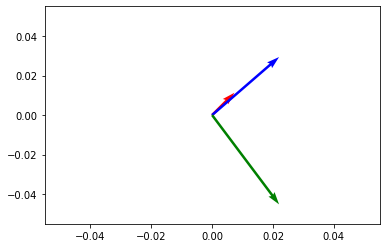

In [ ]:
vec1 = [1,1]
vec2 = [3,2.6]
vec3 = [3,-4]
V = np.array([vec1, vec2, vec3])
origin = np.array([[0, 0, 0],[0, 0, 0]]) # origin point

plt.quiver(*origin, V[:,0], V[:,1], color=['r','b','g'], scale=15)
plt.show()

In [ ]:
cosine_similarity([vec1], [vec2])[0][0]

0.9974586998307349

In [ ]:
cosine_similarity([vec1], [vec3])[0][0]

-0.14142135623730956

In [ ]:
cosine_similarity([vec2], [vec3])[0][0]

-0.07053098106038307

### Real Text vectors

Similar documents (having the same topic) are expected to be similar vectors - have a high cosine similarity

These are 2 texts about `romance`

In [ ]:
cosine_similarity(X[0], X[2])[0][0]

0.5163977794943223

and these about `government`

In [ ]:
cosine_similarity(X[7], X[8])[0][0]

0.1533929977694741

These are supposed to be different, because they come from different corpora

In [ ]:
cosine_similarity(X[0], X[7])[0][0]

0.0

Let's visualize cosine similarity with Seaborn

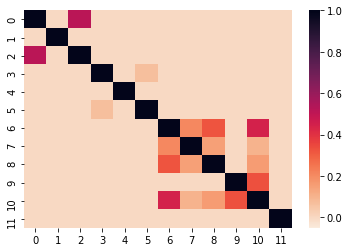

In [ ]:
rows = []
for i in range(len(X.toarray())):
  row = []
  for n in range(len(X.toarray())):
    row.append(cosine_similarity(X[i], X[n])[0][0])
  rows.append(row)

cmap = sns.cm.rocket_r

sns.heatmap(rows,
                 annot=False,
                 fmt=".3f",
                 vmin=-0.05,
                 cmap = cmap)